___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
%pip install xgboost

In [ ]:
%pip install yellowbrick

In [ ]:
%pip install missingno

In [ ]:
%pip install cufflinks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, f1_score, roc_auc_score
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.impute import SimpleImputer
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

import missingno as msno

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

In [2]:
# For checking missing values and missing percent

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [3]:
# To view summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [4]:
def shape_control():
    print('df.shape:', df.shape)
    print('X.shape:', X.shape)
    print('y.shape:', y.shape)
    print('X_train.shape:', X_train.shape)

In [5]:
def show_nulls(data):
    plt.figure(figsize=(30, 15))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [6]:
df_male = pd.read_csv("C:/Users/ihsankoo/Desktop/Clarusway/Machine Learning/Soldiers race classification project/ANSUR II MALE Public.csv", encoding = "latin-1")
df_male

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [7]:
df_female = pd.read_csv("C:/Users/ihsankoo/Desktop/Clarusway/Machine Learning/Soldiers race classification project/ANSUR II FEMALE Public.csv")
df_female

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

## Explore Data

In [8]:
df_male.columns == df_female.columns

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [9]:
df_male.columns = df_male.columns.str.lower().str.replace("&", "_").str.replace(" ", "_")
df_female.columns = df_female.columns.str.lower().str.replace("&", "_").str.replace(" ", "_")

In [10]:
df_male.columns == df_female.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [11]:
df = df_male.append(df_female, ignore_index=True)
df0 = df.copy()
df.sample(5)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
5315,25525,208,1328,316,220,1223,237,174,376,302,274,467,67,297,267,130,1032,233,791,562,463,384,1372,300,983,248,1163,763,660,374,29,54,27,252,737,97,244,308,268,535,432,1016,77,187,185,147,567,194,311,67,351,387,975,585,401,417,443,509,470,66,431,118,345,382,1312,111,395,229,1050,334,139,845,811,532,1629,1607,1320,1031,618,162,693,437,134,804,1559,389,280,803,194,326,986,672,152,791,Female,10-Nov-11,Fort Gordon,Army National Guard,Combat Service Support,25S,Wisconsin,1,NaN,1,19,65,147,Right hand
3255,27733,242,1411,314,222,1305,237,189,399,365,277,523,76,333,305,143,1005,241,824,569,462,373,1458,291,1044,254,1254,813,621,364,35,59,21,304,774,96,256,319,293,592,445,1089,85,204,180,148,573,200,329,68,338,364,1001,650,451,459,468,522,471,65,397,124,397,433,1351,116,407,252,1155,346,134,910,869,575,1693,1690,1383,1067,617,179,802,437,140,843,1662,458,316,883,229,373,1007,789,167,837,Male,2-Feb-12,Fort Huachuca,Army National Guard,Combat Support,42A,Colombia,31,Colombian,3,26,67,170,Right hand
3851,28977,200,1301,306,207,1212,233,185,412,347,256,484,73,326,312,147,967,224,820,573,462,363,1398,282,973,233,1181,764,566,312,38,69,27,239,772,99,244,319,300,555,447,965,82,203,174,158,563,194,314,71,328,352,966,675,440,456,442,507,457,61,384,121,379,419,1336,107,395,238,1186,331,153,874,850,544,1670,1627,1324,1044,596,169,719,417,128,805,1516,440,290,791,199,365,978,697,170,754,Male,20-Mar-12,Camp Shelby,Army National Guard,Combat Service Support,91B,Kansas,3,Mexican,3,22,65,155,Right hand
4816,18252,233,1331,305,203,1226,236,189,365,281,288,443,66,314,280,138,1038,240,824,589,480,350,1401,293,989,256,1126,761,668,363,35,63,26,265,757,98,254,317,240,524,429,1039,76,186,175,157,566,189,304,66,357,391,996,665,383,403,455,505,474,64,387,114,362,410,1278,105,381,236,1029,330,132,862,797,531,1600,1627,1324,1050,588,166,771,450,133,831,1595,432,317,880,204,369,976,672,147,794,Female,8-Jul-11,Fort Lee,Regular Army,Combat Support,92Y,California,3,Mexican,3,29,65,145,Right hand
3454,28104,279,1497,369,213,1372,241,208,434,393,276,543,78,341,332,145,1064,258,933,639,531,375,1574,301,1090,267,1339,911,635,348,38,62,21,225,798,98,279,364,350,635,511,1134,86,211,202,15

In [12]:
df.shape

(6068, 108)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to writingpreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0000000,20757.1984179,13159.3908939,10027.0000000,14841.7500000,20063.5000000,27234.5000000,920103.0000000
abdominalextensiondepthsitting,6068.0000000,246.4686882,37.4001061,155.0000000,219.0000000,242.0000000,271.0000000,451.0000000
acromialheight,6068.0000000,1406.1613382,79.0910484,1115.0000000,1350.0000000,1410.0000000,1462.0000000,1683.0000000
acromionradialelength,6068.0000000,327.3744232,20.7200182,249.0000000,313.0000000,328.0000000,341.2500000,393.0000000
anklecircumference,6068.0000000,224.8913975,16.0518333,156.0000000,214.0000000,225.0000000,235.0000000,293.0000000
axillaheight,6068.0000000,1299.6087673,72.0222861,1038.0000000,1249.0000000,1302.0000000,1349.0000000,1553.0000000
balloffootcircumference,6068.0000000,244.1926500,16.8450202,186.0000000,232.0000000,245.0000000,256.0000000,306.0000000
balloffootlength,6068.0000000,194.7546144,13.5163681,151.0000000,185.0000000,195.0000000,204.0000000,245.0000000
biacromialbreadth,6068.0000000,399.2041859,30.2369141,283.0000000,376.0000000,404.0000000,421.0000000,489.0000000
bicepscircumferenceflexed,6068.0000000,340.9342452,41.5198658,216.0000000,311.0000000,341.0000000,370.0000000,490.0000000


<Figure size 2160x1080 with 0 Axes>

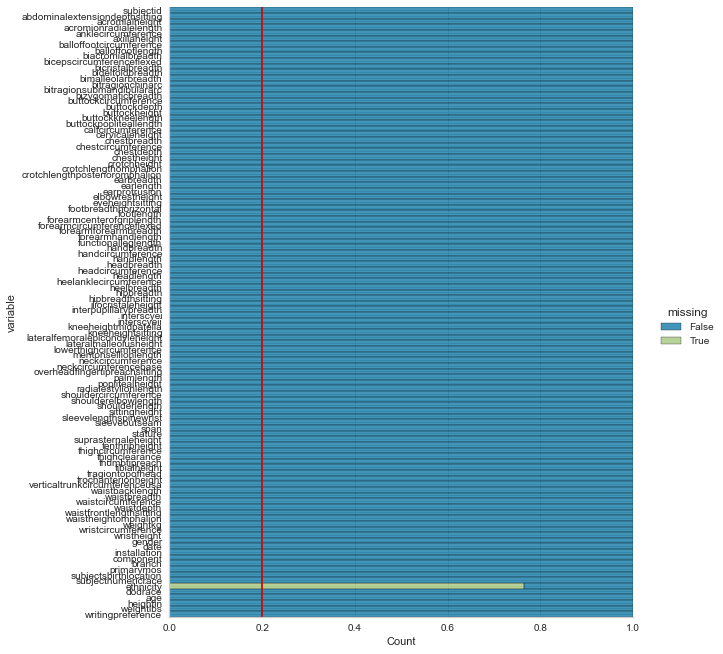

In [15]:
show_nulls(df)

In [16]:
df.duplicated().value_counts()

False    6068
dtype: int64

In [17]:
df.ethnicity.value_counts(dropna=False)

NaN                                                   4647
Mexican                                                357
Puerto Rican                                           183
Caribbean Islander                                     124
Filipino                                                67
Cherokee                                                65
Korean                                                  53
Dominican                                               32
Chinese                                                 26
Japanese                                                22
Vietnamese                                              21
Colombian                                               17
Cuban                                                   17
Arab or Middle Eastern                                  17
Salvadoran                                              16
East/Asian Indian                                       13
Samoan                                                  

In [18]:
df.corr().style.background_gradient(cmap='RdPu')

In [19]:
df[df["subjectnumericrace"]>8][["subjectnumericrace","dodrace"]]

,subjectnumericrace,dodrace
10,351,1
27,61,1
36,61,1
56,28,2
71,28,2
79,21,2
111,41,4
118,31,3
120,641,4
126,23,2


In [20]:
df[["subjectnumericrace", "dodrace"]].sample(10)

,subjectnumericrace,dodrace
3722,1,1
2590,1,1
4626,3,3
449,318,8
1689,1,1
1340,1,1
4410,351,1
3639,2,2
3358,1,1
3225,1,1


In [21]:
df[df["subjectnumericrace"]>8][["subjectnumericrace","dodrace"]].shape

(638, 2)

In [22]:
drop_columns = ["subjectnumericrace",
                "subjectid",
                "date",
                "installation",
                "component",
                "branch",
                "primarymos",
                "subjectsbirthlocation",
                "ethnicity",
                "age",
                "writingpreference"]

In [23]:
df.drop(drop_columns, inplace=True, axis=1)

In [24]:
df.shape

(6068, 97)

In [25]:
df.dodrace.describe()

count   6068.0000000
mean       1.6150297
std        0.9791555
min        1.0000000
25%        1.0000000
50%        1.0000000
75%        2.0000000
max        8.0000000
Name: dodrace, dtype: float64

In [26]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [27]:
df.dodrace.value_counts()<500

1    False
2    False
3    False
4     True
6     True
5     True
8     True
Name: dodrace, dtype: bool

In [28]:
df.drop(df[df["dodrace"] == 4].index, inplace=True)

In [29]:
df.drop(df[df.dodrace == 6].index | df[df.dodrace == 5].index | df[df.dodrace == 8].index, inplace=True)

In [30]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
Name: dodrace, dtype: int64

In [31]:
df.shape

(5769, 97)

In [32]:
print("Skewness:", df.dodrace.skew())

Skewness: 1.1910922146959462


In [33]:
df.dodrace.iplot(kind="hist")

In [34]:
numerical= df.drop(['dodrace'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', '

Finding unusual values in weight

In [35]:
df.weightlbs.describe()

count   5769.0000000
mean     175.5782631
std       33.6004789
min        0.0000000
25%      150.0000000
50%      175.0000000
75%      197.0000000
max      321.0000000
Name: weightlbs, dtype: float64

In [36]:
drop_index = df[df.weightlbs == 0].index
df.drop(drop_index, inplace=True)

In [37]:
df.weightlbs.describe()

count   5768.0000000
mean     175.6087032
std       33.5237451
min       86.0000000
25%      150.0000000
50%      175.0000000
75%      197.0000000
max      321.0000000
Name: weightlbs, dtype: float64

In [38]:
import plotly.express as px
px.box(df, y="weightlbs", title="Weight Distribution", labels={"weightlbs": "Weight (lbs)"})

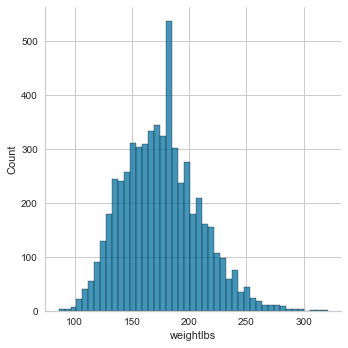

In [39]:
sns.displot(df.weightlbs)
plt.tight_layout()

In [40]:
drop_weight1 = df[(df.weightlbs < 120) & (df.heightin > 70)][["weightlbs", "gender", "heightin"]].index
df.drop(drop_weight1, inplace=True)

In [41]:
df.weightkg.describe()

count   5765.0000000
mean     800.9604510
std      155.9608501
min      358.0000000
25%      686.0000000
50%      790.0000000
75%      900.0000000
max     1442.0000000
Name: weightkg, dtype: float64

In [42]:
df.drop(columns="weightkg", inplace=True)

In [43]:
df.shape

(5765, 96)

Examining Categorical Features

In [44]:
first_looking("gender")

column name    :  gender
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Male      3896
Female    1869
Name: gender, dtype: int64


In [45]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    print(dataset)

In [46]:
correlation(df, 0.9)

      abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
6063                             285            1392                    335   
6064                             262            1324                    301   
6065                             260            1334                    318   
6066                             205            1293                    302   
6067                             238            1346                    308   

      anklecircumference  balloffootcircumference  

In [47]:
df.corr().style.background_gradient(cmap='RdPu')

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,calfcircumference,chestbreadth,chestcircumference,chestdepth,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,forearmcenterofgriplength,functionalleglength,handbreadth,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadthsitting,interpupillarybreadth,interscyei,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,overheadfingertipreachsitting,palmlength,shoulderlength,sleevelengthspinewrist,thighclearance,thumbtipreach,tragiontopofhead,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistfrontlengthsitting,wristcircumference,dodrace,weightlbs
abdominalextensiondepthsitting,1.000000,0.351901,0.312753,0.518999,0.456469,0.332481,0.417477,0.691275,0.505719,0.724562,0.366403,0.530899,0.626153,0.519499,0.739476,0.840804,0.245804,0.476318,0.658552,0.627888,0.825955,0.778461,0.463537,0.199920,0.241721,0.403540,0.139453,0.264234,0.279635,0.345745,0.415120,0.419197,0.301047,0.361368,0.362982,0.329095,0.502460,0.437024,0.554717,0.258276,0.599227,0.220804,0.348188,0.674417,0.294372,0.656873,0.320962,0.310392,0.187371,0.422498,0.724595,0.389299,0.186161,0.728525,0.571899,0.859000,0.579390,0.546881,-0.032101,0.794362
acromialheight,0.351901,1.000000,0.868235,0.504494,0.693877,0.797659,0.733232,0.522492,0.401475,0.628324,0.705100,0.569808,0.583745,0.506775,0.282852,0.341556,0.866906,0.811333,0.409191,0.542332,0.530507,0.280472,0.342031,0.411238,0.358237,0.439356,0.278636,0.292251,0.813525,0.846427,0.894081,0.708336,0.752907,0.406910,0.431850,0.548238,0.797314,0.447545,0.100039,0.337503,0.526190,0.856444,0.677821,0.326964,0.539621,0.627755,0.867332,0.709168,0.542149,0.872314,0.445127,0.803620,0.327477,0.733549,0.727774,0.438342,0.606863,0.733428,-0.218025,0.699734
acromionradialelength,0.312753,0.868235,1.000000,0.415860,0.604005,0.725814,0.667295,0.452306,0.343254,0.559782,0.614909,0.519287,0.514221,0.455989,0.246779,0.291737,0.814056,0.775274,0.354698,0.466113,0.470107,0.265529,0.247327,0.307055,0.310495,0.370214,0.234032,-0.005174,0.639035,0.818000,0.820188,0.623647,0.719731,0.354408,0.389753,0.482988,0.709152,0.438483,0.084352,0.339717,0.469140,0.812159,0.554412,0.284058,0.474861,0.546137,0.790984,0.665021,0.513531,0.871427,0.381328,0.800778,0.292294,0.581609,0.609362,0.373269,0.480612,0.642288,-0.158921,0.615461
anklecircumference,0.518999,0.504494,0.415860,1.000000,0.709480,0.561458,0.536427,0.637466,0.450002,0.640960,0.692002,0.520253,0.531711,0.504319,0.565930,0.577210,0.355087,0.500032,0.817044,0.559197,0.612598,0.485352,0.463016,0.378060,0.214680,0.367803,0.236347,0.309604,0.512664,0.450731,0.513244,0.573393,0.452872,0.404526,0.430701,0.434085,0.729422,0.527872,0.405735,0.240390,0.510167,0.380148,0.487501,0.696991,0.401999,0.574434,0.503432,0.450904,0.350979,0.543102,0.648199,0.456936,0.295425,0.665056,0.510192,0.585063,0.481913,0.697394,-0.158030,0.728412
balloffootcircumference,0.456469,0.693877,0.604005,0.709480,1.000000,0.744805,0.735334,0.662379,0.334697,0.715283,0.799448,0.656712,0.652079,0.615290,0.359382,0.461113,0.545267,0.583022,0.618917,0.584246,0.628105,0.373179,0.326189,0.354429,0.372850,0.468201,0.312633,0.254137,0.649268,0.674562,0.665668,0.821394,0.655693,0.507526,0.503900,0.582591,0.862468,0.632269,0.137913,0.373419,0.601401,0.552306,0.643945,0.486478,0.566062,0.728047,0.682780,0.623180,0.528368,0.747979,0.568846,0.639850,0.344034,0.676954,0.640230,0.507470,0.548331,0.826979,-0.111810,0.742438
balloffootlength,0.332481,0.797659,0.725814,0.561458,0.744805,1.000000,0.740179,0.571504,0

In [48]:
df.shape

(5765, 61)

### Dummy Operation

In [49]:
df = pd.get_dummies(df, columns=["gender"], drop_first=True)

In [50]:
df.shape

(5765, 61)

In [51]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'calfcircumference',
       'chestbreadth', 'chestcircumference', 'chestdepth',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'forearmcenterofgriplength', 'functionalleglength', 'handbreadth',
       'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heelanklecircumference', 'heelbreadth', 'hipbreadthsitting',
       'interpupillarybreadth', 'interscyei', 'lateralfemoralepicondyleheight',
       'latera

In [52]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,calfcircumference,chestbreadth,chestcircumference,chestdepth,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,forearmcenterofgriplength,functionalleglength,handbreadth,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadthsitting,interpupillarybreadth,interscyei,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,overheadfingertipreachsitting,palmlength,shoulderlength,sleevelengthspinewrist,thighclearance,thumbtipreach,tragiontopofhead,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistfrontlengthsitting,wristcircumference,dodrace,weightlbs,gender_Male
0,266,1467,337,222,253,202,401,369,274,493,71,319,291,142,979,240,882,619,373,291,1074,259,607,351,36,71,19,247,802,349,1136,90,193,150,583,206,326,70,366,685,422,500,77,391,118,400,1447,113,145,883,164,786,140,1700,501,329,440,175,1,180,1
1,233,1395,326,220,245,193,394,338,257,479,67,344,320,135,944,232,870,584,357,269,1021,253,615,376,33,62,18,232,781,348,1096,86,195,146,568,201,334,72,356,620,441,488,73,371,131,380,1380,118,141,868,169,822,120,1627,432,316,371,167,1,160,1
2,287,1430,341,230,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,412,288,1120,267,636,359,40,61,23,237,810,355,1115,93,203,148,573,202,356,70,393,665,462,482,72,409,123,403,1447,121,167,910,198,807,125,1678,472,329,411,180,2,205,1
3,234,1347,310,230,262,199,401,359,262,518,73,328,309,143,991,242,821,560,395,296,1114,262,590,341,39,66,25,272,794,352,1034,91,194,158,576,199,341,68,367,640,458,452,76,393,106,407,1357,118,148,848,180,803,127,1625,461,315,399,176,1,175,1
4,250,1585,372,247,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,425,304,1048,232,682,382,32,56,19,188,814,399,1279,94,218,153,566,197,374,69,372,675,481,585,85,458,135,398,1572,132,180,995,194,962,122,1679,467,303,379,188,2,213,1


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [53]:
X = df.drop("dodrace", axis=1)
y = df["dodrace"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
shape_control()

df.shape: (5765, 61)
X.shape: (5765, 60)
y.shape: (5765,)
X_train.shape: (4612, 60)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [57]:
import sklearn
print(sklearn.__version__)

1.2.2


In [58]:
%pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[[733  10  14]
 [ 35 216   5]
 [ 89  20  31]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.86      0.97      0.91       757
           2       0.88      0.84      0.86       256
           3       0.62      0.22      0.33       140

    accuracy                           0.85      1153
   macro avg       0.78      0.68      0.70      1153
weighted avg       0.83      0.85      0.83      1153



Text(70.0, 0.5, 'True labels')

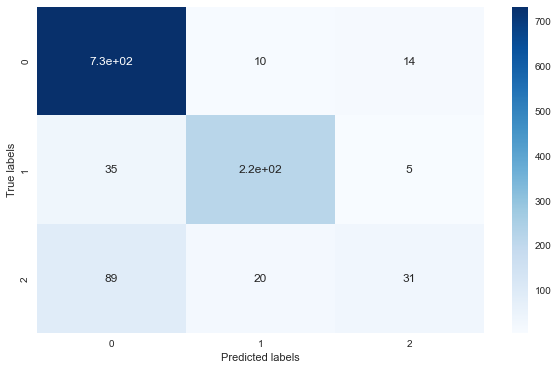

In [59]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
log_f1 = f1_score(y_test, y_pred, average='weighted')
log_recall = recall_score(y_test, y_pred, average='weighted')
log_accuracy = accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

### Cross_Validation of Logistic Regression Model

In [60]:
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

print("--------------------")
print(df_scores.mean()[2:])

--------------------
test_accuracy             0.8644867
test_precision_weighted   0.8491399
test_recall_weighted      0.8644867
test_f1_weighted          0.8446453
dtype: float64


### Logistic Model GridsearchCV

In [61]:
log_model = LogisticRegression(solver='saga', max_iter=500)

In [62]:
log_tuned = LogisticRegression(solver='saga', 
                                     max_iter=5000, 
                                     penalty = "l2", 
                                     l1_ratio = 0.0, 
                                     C = 1000, random_state=42).fit(X_train_scaled,y_train)

In [63]:
y_pred = log_tuned.predict(X_test_scaled)
y_pred

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [64]:
accuracy_score(y_test, y_pred)

0.8603642671292281

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

[[728  12  17]
 [ 28 219   9]
 [ 74  21  45]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.88      0.96      0.92       757
           2       0.87      0.86      0.86       256
           3       0.63      0.32      0.43       140

    accuracy                           0.86      1153
   macro avg       0.79      0.71      0.74      1153
weighted avg       0.85      0.86      0.85      1153



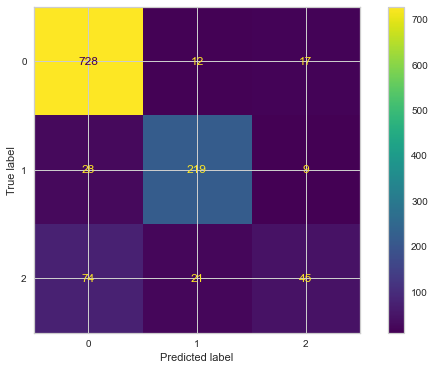

In [82]:
y_pred = log_tuned.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## 2. SVC

### Vanilla SVC model 

[[745   8   4]
 [ 32 221   3]
 [104  20  16]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.85      0.98      0.91       757
           2       0.89      0.86      0.88       256
           3       0.70      0.11      0.20       140

    accuracy                           0.85      1153
   macro avg       0.81      0.65      0.66      1153
weighted avg       0.84      0.85      0.82      1153



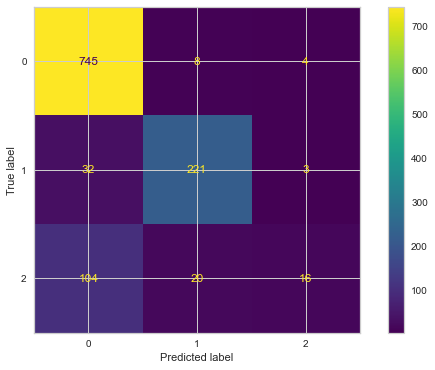

In [87]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
svc_f1 = f1_score(y_test, y_pred, average="weighted")
svc_recall = recall_score(y_test, y_pred, average="weighted")
#svc_auc = roc_auc_score(y_test, y_pred)
svc_accuracy = accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

### Cross_Validation of SVM

In [88]:
model = SVC(random_state=42)
scores = cross_validate(model, X_train_scaled, y_train, scoring = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

print("--------------------")
print(df_scores.mean()[2:])

--------------------
test_accuracy             0.8588486
test_precision_weighted   0.8524073
test_recall_weighted      0.8588486
test_f1_weighted          0.8264912
dtype: float64


###  SVC Model GridsearchCV

In [89]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}

In [90]:
model = SVC()

In [91]:
SVM_model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [100]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
print(f"Best Parameters of GridgeSearchCV for SVM Model: {SVM_model_grid.best_params_}")
print("-------------------------------------------------------------------------------")
print(f"Best Estimator of GridgeSearchCV for SVM Model: {SVM_model_grid.best_estimator_}")

In [102]:
model = SVC(C = 100, 
            gamma = 0.001, 
            kernel ='rbf', random_state=42).fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

In [103]:
svm_tuned = SVC(C = 100, 
            gamma = 0.001, 
            kernel ='rbf', random_state=42).fit(X_train_scaled, y_train)

In [104]:
y_pred = svm_tuned.predict(X_test)

In [105]:
accuracy_score(y_test, y_pred)

0.6565481352992194

Visualizing SVM model

--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.82      0.99      0.90       757
           2       0.88      0.82      0.85       256
           3       0.00      0.00      0.00       140

    accuracy                           0.83      1153
   macro avg       0.57      0.60      0.58      1153
weighted avg       0.73      0.83      0.78      1153



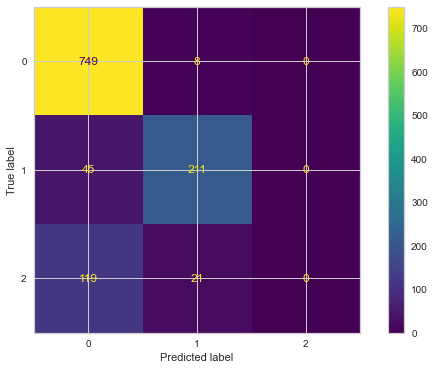

In [107]:
y_pred = svm_tuned.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## 3. RF (Random Forest)

### Vanilla RF Model

In [108]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred, average='weighted')
rf_recall = recall_score(y_test, y_pred, average='weighted')
#rf_auc = roc_auc_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cm
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix=cm)

--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.81      0.98      0.89       757
           2       0.88      0.77      0.82       256
           3       0.70      0.05      0.09       140

    accuracy                           0.82      1153
   macro avg       0.80      0.60      0.60      1153
weighted avg       0.81      0.82      0.78      1153



### Cross-Validation of RF

In [109]:
model = RandomForestClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

print("--------------------")
print(df_scores.mean()[2:])

--------------------
test_accuracy             0.8176480
test_precision_weighted   0.8024369
test_recall_weighted      0.8176480
test_f1_weighted          0.7730722
dtype: float64


### RF Model GridsearchCV

In [110]:
rf = RandomForestClassifier(random_state=42)

In [111]:
rf_params = {"n_estimators": [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}

In [113]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits

In [115]:
rf_cv_model.best_params_

{'max_features': 8, 'min_samples_split': 2, 'n_estimators': 1000}

In [116]:
rf_tuned = RandomForestClassifier(max_features = 8, 
                                  min_samples_split = 2, 
                                  n_estimators = 1000).fit(X_train, y_train)

In [117]:
y_pred = rf_tuned.predict(X_test)

In [118]:
accuracy_score(y_test, y_pred)

0.8161318300086731

#### Visualizing RF Model

--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.81      0.98      0.89       757
           2       0.87      0.74      0.80       256
           3       0.67      0.04      0.08       140

    accuracy                           0.82      1153
   macro avg       0.78      0.59      0.59      1153
weighted avg       0.80      0.82      0.77      1153



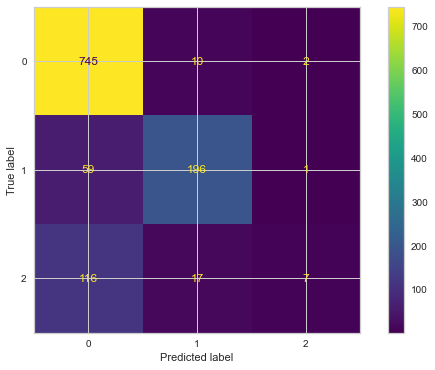

In [120]:
y_pred = rf_tuned.predict(X_test)
cvm = confusion_matrix(y_test, y_pred)
cm
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## 4. XGBoost

### Vanilla XGBoost Model

--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       757
           1       0.88      0.82      0.85       256
           2       0.64      0.16      0.26       140

    accuracy                           0.84      1153
   macro avg       0.79      0.65      0.67      1153
weighted avg       0.83      0.84      0.81      1153



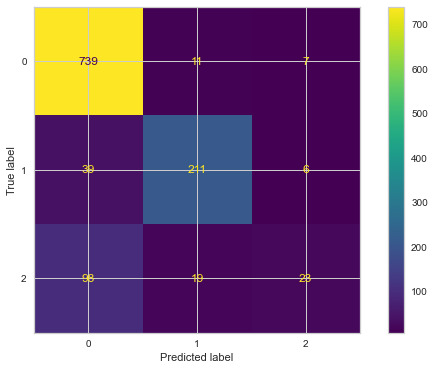

In [155]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train-1)  # subtract 1 from y to convert labels to start from 0
y_pred_prob = xgb_model.predict_proba(X_test)  # predict probabilities instead of labels
y_pred = np.argmax(y_pred_prob, axis=1)  # convert probabilities to labels
xgb_f1 = f1_score(y_test-1, y_pred, average='weighted')  # subtract 1 from y_test
xgb_recall = recall_score(y_test-1, y_pred, average='weighted')  # subtract 1 from y_test
# xgb_auc = roc_auc_score(to_categorical(y_test-1), y_pred_prob, average='macro', multi_class="ovo")  # use to_categorical on y_test
xgb_accuracy = accuracy_score(y_test-1, y_pred)  # subtract 1 from y_test

cm = confusion_matrix(y_test-1, y_pred)  # subtract 1 from y_test
print("--------------------------------------------------------")
print(classification_report(y_test-1, y_pred))  # subtract 1 from y_test
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


Cross_Validating XGBoost

In [158]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train-1, scoring = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"], cv = 10)
xgb_scores = pd.DataFrame(scores, index = range(1, 11))

print("--------------------")
print(xgb_scores.mean()[2:])



--------------------
test_accuracy             0.8441037
test_precision_weighted   0.8242464
test_recall_weighted      0.8441037
test_f1_weighted          0.8203181
dtype: float64


### XGBoost Model GridsearchCV

In [131]:
xgb = XGBClassifier()

In [132]:
xgb_params = {"n_estimators": [100, 500, 1000],
             "subsample":[0.6,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.001,0.01]}

In [134]:
# xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, 
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [135]:
# xgb_cv_model.best_params_

In [137]:

xgb_tuned = xgb = XGBClassifier(learning_rate= 0.1, 
                                max_depth= 5, 
                                n_estimators= 1000, 
                                subsample= 0.8).fit(X_train, y_train-1)


In [138]:
y_pred = xgb_tuned.predict(X_test)

In [139]:
accuracy_score(y_test,y_pred)

0.014744145706851692

## Comparing Models

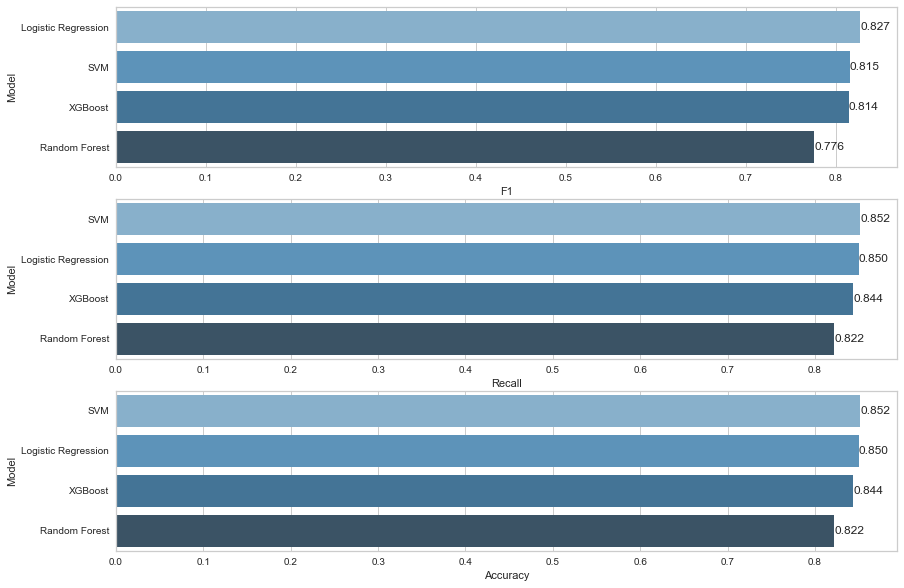

In [164]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
                        "F1": [log_f1, svc_f1, rf_f1, xgb_f1],
                        "Recall": [log_recall, svc_recall, rf_recall, xgb_recall],
                        "Accuracy": [log_accuracy, svc_accuracy, rf_accuracy, xgb_accuracy]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## Choose the best model based on the metric and make a random prediction

In [165]:
scaler = MinMaxScaler().fit(X)

In [166]:
import pickle
pickle.dump(scaler, open("scaler_ansur_II_public", 'wb'))

In [167]:
X_scaled = scaler.transform(X)

In [168]:
final_model = LogisticRegression(penalty = 'l2', 
                           C = 127.42749857031335, 
                           l1_ratio = 0.0, 
                           solver='saga', 
                           max_iter=5000, random_state=42).fit(X_scaled, y)

In [169]:
pickle.dump(final_model, open("final_model_ansur_II_public", 'wb'))

In [170]:
samples = df.sample(10)
X_samples = samples.drop("dodrace", axis=1)
y_samples = samples["dodrace"]

In [171]:
scaler_ansur_II_public = pickle.load(open("scaler_ansur_II_public", "rb"))
scaler_ansur_II_public

MinMaxScaler()

In [172]:
X_samples_scaled = scaler_ansur_II_public.transform(X_samples)
X_samples_scaled

array([[0.21959459, 0.57728119, 0.61111111, 0.52554745, 0.56666667,
        0.58510638, 0.51941748, 0.54379562, 0.46060606, 0.47142857,
        0.58333333, 0.55084746, 0.44137931, 0.5       , 0.47019868,
        0.45303867, 0.51179245, 0.47470817, 0.46692607, 0.48      ,
        0.40826873, 0.34741784, 0.50613497, 0.48888889, 0.47619048,
        0.31428571, 0.57142857, 0.68115942, 0.69767442, 0.57594937,
        0.49064449, 0.44736842, 0.59550562, 0.5       , 0.58646617,
        0.59649123, 0.6137931 , 0.51111111, 0.3908046 , 0.57692308,
        0.45205479, 0.54958678, 0.56      , 0.30322581, 0.56923077,
        0.58577406, 0.69259259, 0.60416667, 0.32051282, 0.50947867,
        0.42028986, 0.59343434, 0.73333333, 0.53466872, 0.49802372,
        0.408     , 0.62439024, 0.45652174, 0.4212766 , 1.        ],
       [0.37837838, 0.68156425, 0.65972222, 0.54744526, 0.58333333,
        0.54255319, 0.62135922, 0.45255474, 0.6       , 0.53571429,
        0.58333333, 0.65254237, 0.5862069 , 0.5

---
---

---
---

In [173]:
final_model = pickle.load(open("final_model_ansur_II_public", "rb"))

In [174]:
predictions = final_model.predict(X_samples_scaled)
predictions_proba = final_model.predict_proba(X_samples_scaled)

In [175]:
samples["pred"] = predictions
samples["pred_1"] = predictions_proba[:,0]
samples["pred_2"] = predictions_proba[:,1]
samples["pred_3"] = predictions_proba[:,2]
samples

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,calfcircumference,chestbreadth,chestcircumference,chestdepth,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,forearmcenterofgriplength,functionalleglength,handbreadth,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadthsitting,interpupillarybreadth,interscyei,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,overheadfingertipreachsitting,palmlength,shoulderlength,sleevelengthspinewrist,thighclearance,thumbtipreach,tragiontopofhead,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistfrontlengthsitting,wristcircumference,dodrace,weightlbs,gender_Male,pred,pred_1,pred_2,pred_3
1612,220,1456,337,228,254,206,390,365,273,489,76,332,309,141,1021,250,873,601,386,285,1011,244,638,353,35,57,25,279,834,349,1071,84,203,154,580,202,347,71,382,660,402,485,71,384,128,415,1485,121,132,851,179,837,138,1689,471,313,417,166,1,185,1,1,0.6638770,0.1427043,0.1934186
865,267,1512,344,231,256,202,411,340,296,507,76,344,330,143,1005,232,936,633,393,293,1054,251,632,381,41,78,24,290,883,369,1128,94,197,154,568,196,340,74,388,650,450,512,80,417,128,405,1491,116,158,907,178,850,134,1756,523,339,431,184,1,195,1,1,0.9842422,0.0000226,0.0157352
2837,193,1352,320,210,232,193,414,291,273,478,70,320,303,140,899,198,842,567,347,299,956,204,553,328,32,63,20,233,752,323,1047,83,185,154,574,200,317,74,337,630,413,461,58,354,119,362,1310,112,153,866,161,732,133,1498,408,296,354,155,3,137,1,1,0.5498890,0.0122127,0.4378983
4040,287,1471,338,230,277,229,418,374,276,494,77,357,338,147,1022,247,942,647,391,291,1098,279,592,320,40,62,19,220,803,375,1136,93,223,166,596,204,371,80,379,630,455,519,76,417,122,413,1440,123,155,937,183,868,129,1670,511,329,430,182,2,205,1,2,0.0122066,0.9819919,0.0058015
990,203,1352,324,211,236,182,409,310,253,479,72,315,299,134,879,197,809,573,356,270,922,208,552,334,36,59,17,215,794,324,1078,80,174,146,566,198,307,73,333,590,416,457,62,358,138,365,1408,108,154,856,156,773,119,1538,448,265,362,164,1,135,1,1,0.8213640,0.0184289,0.1602071
1049,340,1598,367,243,263,210,478,443,282,597,84,364,345,158,1236,322,1001,718,438,312,1255,299,774,444,40,66,22,252,869,390,1287,89,205,162,614,212,375,81,464,625,462,547,76,477,126,437,1646,126,180,977,235,938,138,1960,505,399,464,183,2,293,1,2,0.0036803,0.9871581,0.0091616
5843,271,1305,310,225,249,185,380,379,287,503,71,321,306,140,1153,280,804,612,417,291,1086,306,694,387,36,60,20,241,751,300,998,85,176,142,574,187,327,74,423,670,460,458,58,456,110,388,1242,106,140,823,198,742,130,1653,430,337,326,169,2,185,0,2,0.2072707,0.7077714,0.0849578
4202,254,1435,325,243,247,201,380,290,303,465,75,330,288,149,1041,240,899,595,393,284,937,246,681,401,34,63,21,267,806,337,1085,86,194,157,576,194,337,68,416,670,387,500,73,397,110,322,1448,123,147,845,177,788,137,1616,435,311,380,165,1,158,0,1,0.9012971,0.0029138,0.0957891
1321,289,1474,333,228,254,206,436,455,302,557,75,365,337,148,1104,258,947,653,440,294,1206,291,661,392,36,55,24,247,781,370,1173,95,200,157,584,206,349,76,410,685,442,512,73,428,133,433,1408,123,146,935,198,825,135,1729,455,344,392,186,2,220,1,2,0.0123277,0.9831584,0.0045138
5210,220,1305,300,216,222,176,365,286,252,457,68,326,303,136,1008,240,801,557,358,283,929,251,643,333,33,62,22,238,728,308,1002,81,175,145,560,195,301,63,390,580,366,448,60,396,111,347,1290,105,125,771,174,713,132,1523,416,295,327,154,3,140,0,1,0.7548986,0.0085385,0.2365629


In [176]:
samples[['dodrace','pred']]

,dodrace,pred
1612,1,1
865,1,1
2837,3,1
4040,2,2
990,1,1
1049,2,2
5843,2,2
4202,1,1
1321,2,2
5210,3,1


# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [65]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [67]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7117611688309081

In [68]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7037678310117179

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [179]:
%pip install shap

  Using cached shap-0.41.0-cp39-cp39-win_amd64.whl (435 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [182]:
# Numba needs NumPy 1.21 or less

In [181]:
np.__version__

'1.22.4'

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

(1, 232)


In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___